In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
 

In [2]:
applications = pd.read_csv('../data/application_record.csv')
applications.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
credits = pd.read_csv('../data/credit_record.csv')
credits.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


The variable `STATUS` is defined this way:
- 0: 1-29 days past due 
- 1: 30-59 days past due 
- 2: 60-89 days overdue 
- 3: 90-119 days overdue 
- 4: 120-149 days overdue 
- 5: Overdue or bad debts, write-offs for more than 150 days 
- C: paid off that month 
- X: No loan for the month

The majority of the people in the sample do not have debt. 

In [4]:
credits.STATUS.value_counts(normalize=True)

C    0.421554
0    0.365372
X    0.199537
1    0.010576
5    0.001615
2    0.000828
3    0.000305
4    0.000213
Name: STATUS, dtype: float64

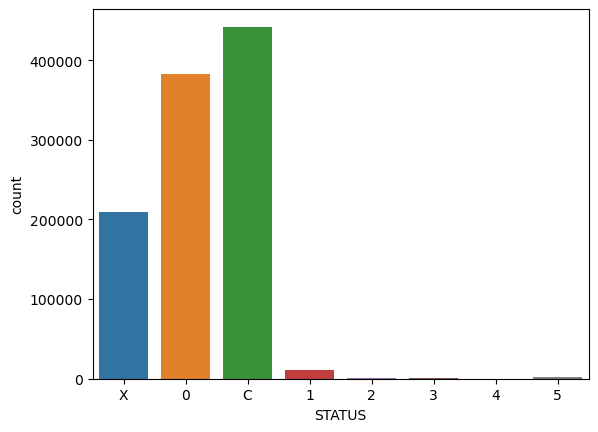

In [5]:
sns.countplot(x = credits['STATUS']);

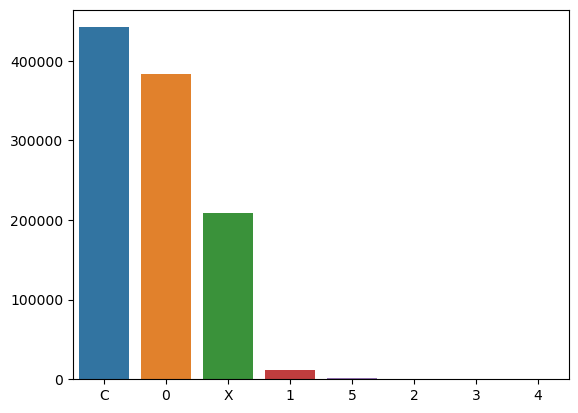

In [6]:
grouped = credits['STATUS'].value_counts()
sns.barplot(x=grouped.index, y=grouped.values);

In [7]:
# boxplot of income by status

The credit data has over a million observations and the application data has more than 400000 observations. 

In [8]:
credits.shape

(1048575, 3)

In [9]:
applications.shape

(438557, 18)

There are about 46000 unique IDs in the credit data. Most observations in the application are indeed unique. 

In [10]:
credits['ID'].nunique()

45985

In [11]:
applications['ID'].nunique()

438510

The final sample would only consists of the unique observations that are in both application and credit samples. As can be seen there are more than 36000 unique applications that are also present in the credit data.

In [12]:
len(set(applications['ID']).intersection(set(credits['ID'])))

36457

In [13]:
len(set(applications['ID']).difference(set(credits['ID'])))

402053

In [14]:
len(set(credits['ID']).difference(set(applications['ID'])))

9528

In [15]:
applications.groupby('ID')['ID'].count().value_counts()


1    438463
2        47
Name: ID, dtype: int64

There are 47 ID's that are repeated in the sample. Let's take a closer look into these observations. 

In [16]:
applications.groupby('ID').filter(lambda x: len(x) == 2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421211,7702516,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-11753,-1256,1,1,1,0,Sales staff,4.0
421268,7602432,M,N,Y,0,315000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16627,-1304,1,0,1,0,Drivers,2.0
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
421698,7213374,M,Y,N,0,148500.0,Working,Secondary / secondary special,Married,House / apartment,-9950,-961,1,0,1,0,Laborers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433158,7282535,F,N,Y,0,63000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21124,365243,1,0,1,0,NaN,2.0
433159,7742853,M,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15052,-1695,1,0,0,0,Laborers,1.0
433217,7135270,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0
433666,7091721,F,Y,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14116,-2269,1,0,0,0,Medicine staff,2.0


> As can be seen there is quite a drastic difference between the duplicated IDs. It doesn't seem reasonable to keep them in the sample. 

There are no duplicates in the samples

In [17]:
applications.duplicated().sum()

0

In [18]:
credits.duplicated().sum()

0

The only feature with missing values is `OCCUPATION_TYPE`. We will latet get back to it for a more detailed assessment.

In [19]:
applications.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [20]:
credits.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

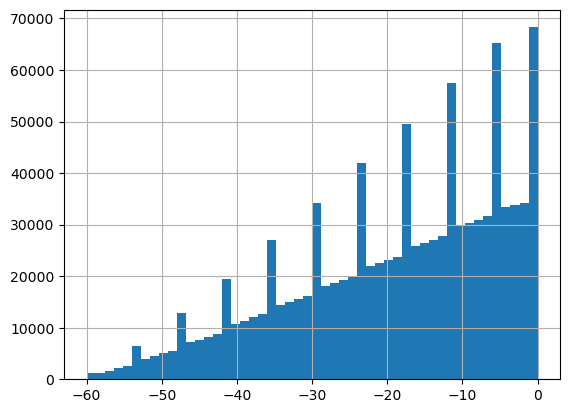

In [21]:
credits['MONTHS_BALANCE'].hist(bins=50);

In [22]:
credits.groupby('ID')['MONTHS_BALANCE'].count().sort_values()

ID
5105073     1
5095685     1
5022122     1
5061673     1
5116407     1
           ..
5010021    61
5011920    61
5024819    61
5010943    61
5005421    61
Name: MONTHS_BALANCE, Length: 45985, dtype: int64

The code snippet above shows the length of the credit record for each unique ID in the sample. The length of credit can be as low as 1 to as high as 61 months.  

In [23]:
credits['is_delinquent'] = np.where(credits['STATUS'].isin(['C', 'X']), 0, 1)

In [24]:
credits.head()

,ID,MONTHS_BALANCE,STATUS,is_delinquent
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,1
3,5001711,-3,0,1
4,5001712,0,C,0


In [25]:
credits=credits.drop(columns='STATUS')

As part of our data cleaning process, we are using groupby and transfrom function to add within group statistics to the original dataset. [source](https://www.statology.org/pandas-groupby-transform/) 

In [26]:
credits['length_of_credit'] = credits.groupby('ID')['MONTHS_BALANCE'].transform('count')
credits.head()

,ID,MONTHS_BALANCE,is_delinquent,length_of_credit
0,5001711,0,0,4
1,5001711,-1,1,4
2,5001711,-2,1,4
3,5001711,-3,1,4
4,5001712,0,0,19


In [27]:
credits['number_of_delinquent_months'] = credits.groupby('ID')['is_delinquent'].transform('sum')
credits['average_delinquency_rate'] = credits.groupby('ID')['is_delinquent'].transform('mean')

credits.head()

,ID,MONTHS_BALANCE,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate
0,5001711,0,0,4,3,0.750000
1,5001711,-1,1,4,3,0.750000
2,5001711,-2,1,4,3,0.750000
3,5001711,-3,1,4,3,0.750000
4,5001712,0,0,19,10,0.526316


In [28]:
credits['month_rank'] = credits.groupby('ID')['MONTHS_BALANCE'].transform('rank')

credits.head()

,ID,MONTHS_BALANCE,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,month_rank
0,5001711,0,0,4,3,0.750000,4.0
1,5001711,-1,1,4,3,0.750000,3.0
2,5001711,-2,1,4,3,0.750000,2.0
3,5001711,-3,1,4,3,0.750000,1.0
4,5001712,0,0,19,10,0.526316,19.0


In [29]:
nlargest = credits.groupby('ID')['month_rank'].nlargest(3).reset_index(level=1, drop=True).reset_index()
nlargest.head()

,ID,month_rank
0,5001711,4.0
1,5001711,3.0
2,5001711,2.0
3,5001712,19.0
4,5001712,18.0


In [30]:
recent_3_credit_reports = credits.merge(nlargest, how='inner', on=['ID', 'month_rank'])
recent_3_credit_reports.head()

,ID,MONTHS_BALANCE,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,month_rank
0,5001711,0,0,4,3,0.750000,4.0
1,5001711,-1,1,4,3,0.750000,3.0
2,5001711,-2,1,4,3,0.750000,2.0
3,5001712,0,0,19,10,0.526316,19.0
4,5001712,-1,0,19,10,0.526316,18.0


In [31]:
recent_3_credit_reports.shape

(136069, 7)

The last few code cells above creates a smaller version of the sample where only the most recent 3 month of credit report are kept. The purpose is to calculate if the person has been delinquent in the past three month. 

In [32]:
recent3 = recent_3_credit_reports.groupby('ID')['is_delinquent'].max().rename('3mo_delinquency')
credit_full = credits.merge(recent3, how='left', on='ID')
credit_full.head()

,ID,MONTHS_BALANCE,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,month_rank,3mo_delinquency
0,5001711,0,0,4,3,0.750000,4.0,1
1,5001711,-1,1,4,3,0.750000,3.0,1
2,5001711,-2,1,4,3,0.750000,2.0,1
3,5001711,-3,1,4,3,0.750000,1.0,1
4,5001712,0,0,19,10,0.526316,19.0,0


In [33]:
credit_full.shape

(1048575, 8)

> Instead of only creating emo_delinquency, we can create 6, and 12 months as well. For that, we are creating a function which is included in the functions.py.

In [34]:
credit_full.sort_values(['ID', 'MONTHS_BALANCE'], ascending=[True, False]).drop_duplicates(subset='ID', keep='first').drop(columns=['MONTHS_BALANCE', 'month_rank'])

,ID,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,3mo_delinquency
0,5001711,0,4,3,0.750000,1
4,5001712,0,19,10,0.526316,0
23,5001713,0,22,0,0.000000,0
45,5001714,0,15,0,0.000000,0
60,5001715,0,60,0,0.000000,0
...,...,...,...,...,...,...
1048494,5150482,0,18,12,0.666667,0
1048512,5150483,0,18,0,0.000000,0
1048530,5150484,0,13,12,0.923077,1
1048543,5150485,1,2,2,1.000000,1


In [35]:
credit_full = credit_full.sort_values(['ID', 'MONTHS_BALANCE'], ascending=[True, False])
credit_cleaned = credit_full.drop_duplicates(subset='ID', keep='first').drop(columns=['MONTHS_BALANCE', 'month_rank'])
credit_cleaned.head()

,ID,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,3mo_delinquency
0,5001711,0,4,3,0.750000,1
4,5001712,0,19,10,0.526316,0
23,5001713,0,22,0,0.000000,0
45,5001714,0,15,0,0.000000,0
60,5001715,0,60,0,0.000000,0


In [36]:
applications.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


We are dropping gender from the sample to avoid systemic bias in our model predictions and recommendations.

In [37]:
applications.drop(columns='CODE_GENDER', inplace=True)

In [38]:
for col in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    applications[col] = np.where(applications[col]=='Y', 1, 0)

In [39]:
applications['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [40]:
applications['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [41]:
applications['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [42]:
applications['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [43]:
applications['OCCUPATION_TYPE'].value_counts(dropna=False, normalize=False)

NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

What do you guys think we should do about the missing values in `OCCUPATION_TYPE`? I think first we need to think why is it missing? is it random or is it because, the correct label was not available in the list? The way we should handle would be different based on our answer. 

In [44]:
applications.groupby('OCCUPATION_TYPE', dropna=False)['AMT_INCOME_TOTAL'].mean().sort_values()

OCCUPATION_TYPE
Cleaning staff           147064.463815
Low-skill Laborers       150334.309346
Cooking staff            155848.425334
Waiters/barmen staff     158796.621622
Medicine staff           168102.197707
Secretaries              169456.878669
Security staff           169835.113662
NaN                      170869.803331
Sales staff              170912.759267
Laborers                 179865.810449
Core staff               190905.844378
High skill tech staff    195712.011010
Private service staff    201600.651042
Drivers                  202065.242047
HR staff                 203620.686047
IT staff                 210958.733444
Accountants              215137.274977
Realty agents            223510.806916
Managers                 282125.938701
Name: AMT_INCOME_TOTAL, dtype: float64

> the incomes in this sample do not make any sense. I am a lot more suspicious about this sample now. 
In any case, looking at the income averages. I think we can just create a new category called missing and add it to the sample.

In [45]:
applications['OCCUPATION_TYPE'] = applications['OCCUPATION_TYPE'].fillna('missing')

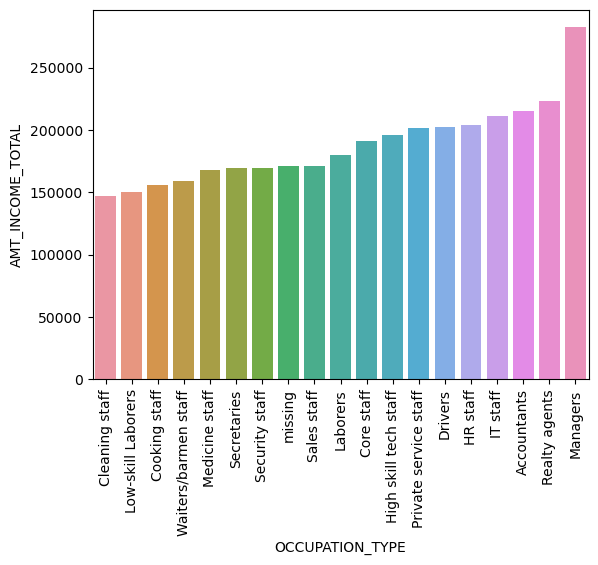

In [46]:
grouped = applications.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()
sns.barplot(x=grouped.index, y=grouped)
plt.xticks(rotation=90);

> I believe we should leave converting of all the other categroical variables to dummy variable to one hot encoder. That is why I'm not cleaning them at this stage. 

In [47]:
applications[applications['DAYS_EMPLOYED'] > 0].value_counts().sum()

75329

In [48]:
applications['DAYS_EMPLOYED'] = np.where(applications['DAYS_EMPLOYED'] > 0, 0, applications['DAYS_EMPLOYED'])

In [49]:
applications[applications['DAYS_EMPLOYED'] == 0].value_counts().sum()

75329

In [50]:
applications['OCCUPATION_TYPE'] = np.where(applications['DAYS_EMPLOYED'] == 0, 'Retired', applications['OCCUPATION_TYPE'])

In [51]:
applications[applications['DAYS_EMPLOYED'] == 0].head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
7,5008812,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Retired,1.0
8,5008813,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Retired,1.0
9,5008814,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,0,1,0,0,0,Retired,1.0
76,5008884,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,0,1,0,0,0,Retired,1.0
160,5008974,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,0,1,0,0,0,Retired,2.0


In [52]:
applications['AGE'] = (abs(applications['DAYS_BIRTH']) / 365).astype(int)
applications['YEARS_EMPLOYED'] = (abs(applications['DAYS_EMPLOYED']) / 365).astype(int)
applications.drop(columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace = True)

In [53]:
data_merged = credit_cleaned.merge(applications, how='inner', on='ID')
print(data_merged.shape)
data_merged.head(10)

(36457, 22)


,ID,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,3mo_delinquency,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,0,16,2,0.125000,0,1,1,0,427500.0,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
1,5008805,0,15,2,0.133333,0,1,1,0,427500.0,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
2,5008806,0,30,7,0.233333,0,1,1,0,112500.0,...,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,1,5,2,0.400000,1,0,1,0,270000.0,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,0,5,0,0.000000,0,0,1,0,270000.0,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
5,5008810,0,27,6,0.222222,0,0,1,0,270000.0,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
6,5008811,0,39,6,0.153846,0,0,1,0,270000.0,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
7,5008812,1,17,14,0.823529,1,0,1,0,283500.0,...,Separated,House / apartment,1,0,0,0,Retired,1.0,61,0
8,5008813,1,17,14,0.823529,1,0,1,0,283500.0,...,Separated,House / apartment,1,0,0,0,Retired,1.0,61,0
9,5008814,1,17,14,0.823529,1,0,1,0,283500.0,...,Separated,House / apartment,1,0,0,0,Retired,1.0,61,0


In [54]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           36457 non-null  int64  
 1   is_delinquent                36457 non-null  int64  
 2   length_of_credit             36457 non-null  int64  
 3   number_of_delinquent_months  36457 non-null  int64  
 4   average_delinquency_rate     36457 non-null  float64
 5   3mo_delinquency              36457 non-null  int64  
 6   FLAG_OWN_CAR                 36457 non-null  int64  
 7   FLAG_OWN_REALTY              36457 non-null  int64  
 8   CNT_CHILDREN                 36457 non-null  int64  
 9   AMT_INCOME_TOTAL             36457 non-null  float64
 10  NAME_INCOME_TYPE             36457 non-null  object 
 11  NAME_EDUCATION_TYPE          36457 non-null  object 
 12  NAME_FAMILY_STATUS           36457 non-null  object 
 13  NAME_HOUSING_TYP

In [55]:
data_merged

,ID,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,3mo_delinquency,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,0,16,2,0.125000,0,1,1,0,427500.0,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
1,5008805,0,15,2,0.133333,0,1,1,0,427500.0,...,Civil marriage,Rented apartment,1,1,0,0,missing,2.0,32,12
2,5008806,0,30,7,0.233333,0,1,1,0,112500.0,...,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3
3,5008808,1,5,2,0.400000,1,0,1,0,270000.0,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,0,5,0,0.000000,0,0,1,0,270000.0,...,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,0,18,12,0.666667,0,1,1,1,157500.0,...,Married,House / apartment,1,0,0,0,Core staff,3.0,29,4
36453,5150483,0,18,0,0.000000,0,1,1,1,157500.0,...,Married,House / apartment,1,0,0,0,Core staff,3.0,29,4
36454,5150484,0,13,12,0.923077,1,1,1,1,157500.0,...,Married,House / apartment,1,0,0,0,Core staff,3.0,29,4
36455,5150485,1,2,2,1.000000,1,1,1,1,157500.0,...,Married,House / apartment,1,0,0,0,Core staff,3.0,29,4


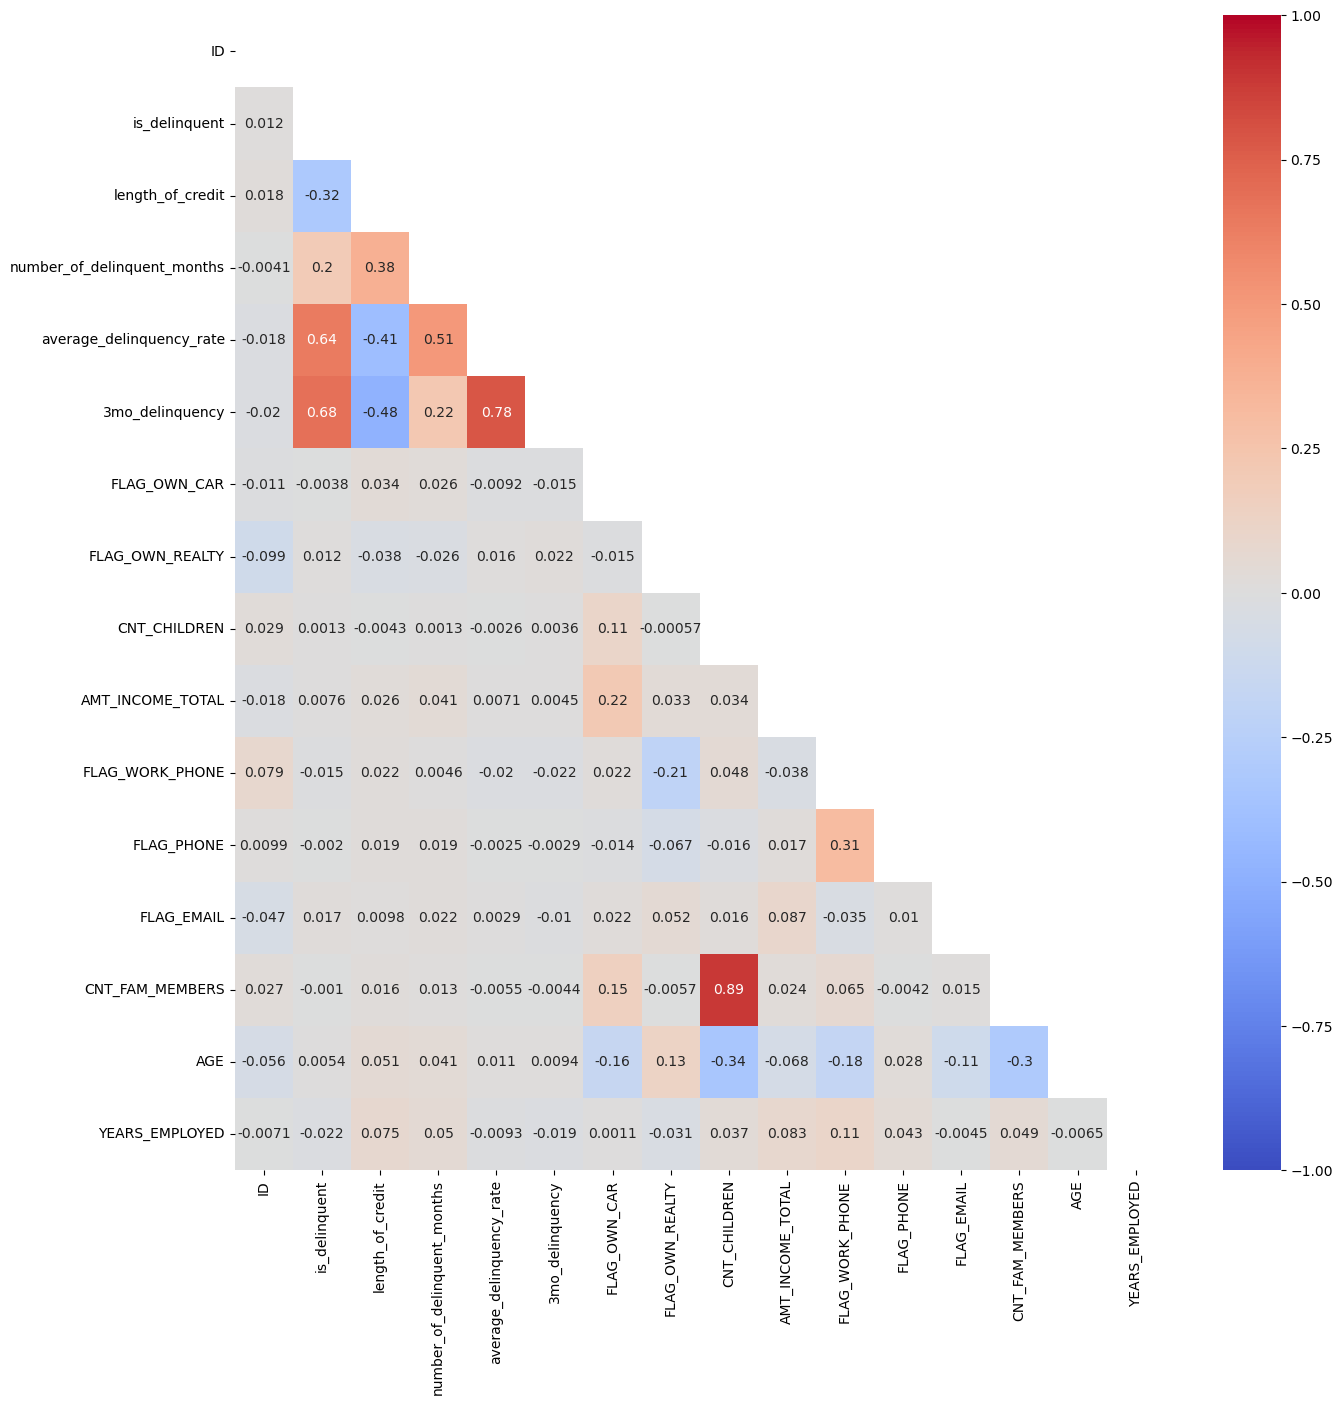

In [57]:
numericals = list(data_merged.select_dtypes(include=['int64', 'float64']).columns)
numericals.remove('FLAG_MOBIL')
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(data_merged[numericals].corr()))
sns.heatmap(data_merged[numericals].corr(), mask=mask, cmap='coolwarm',
            vmin = -1, vmax=1,annot=True);

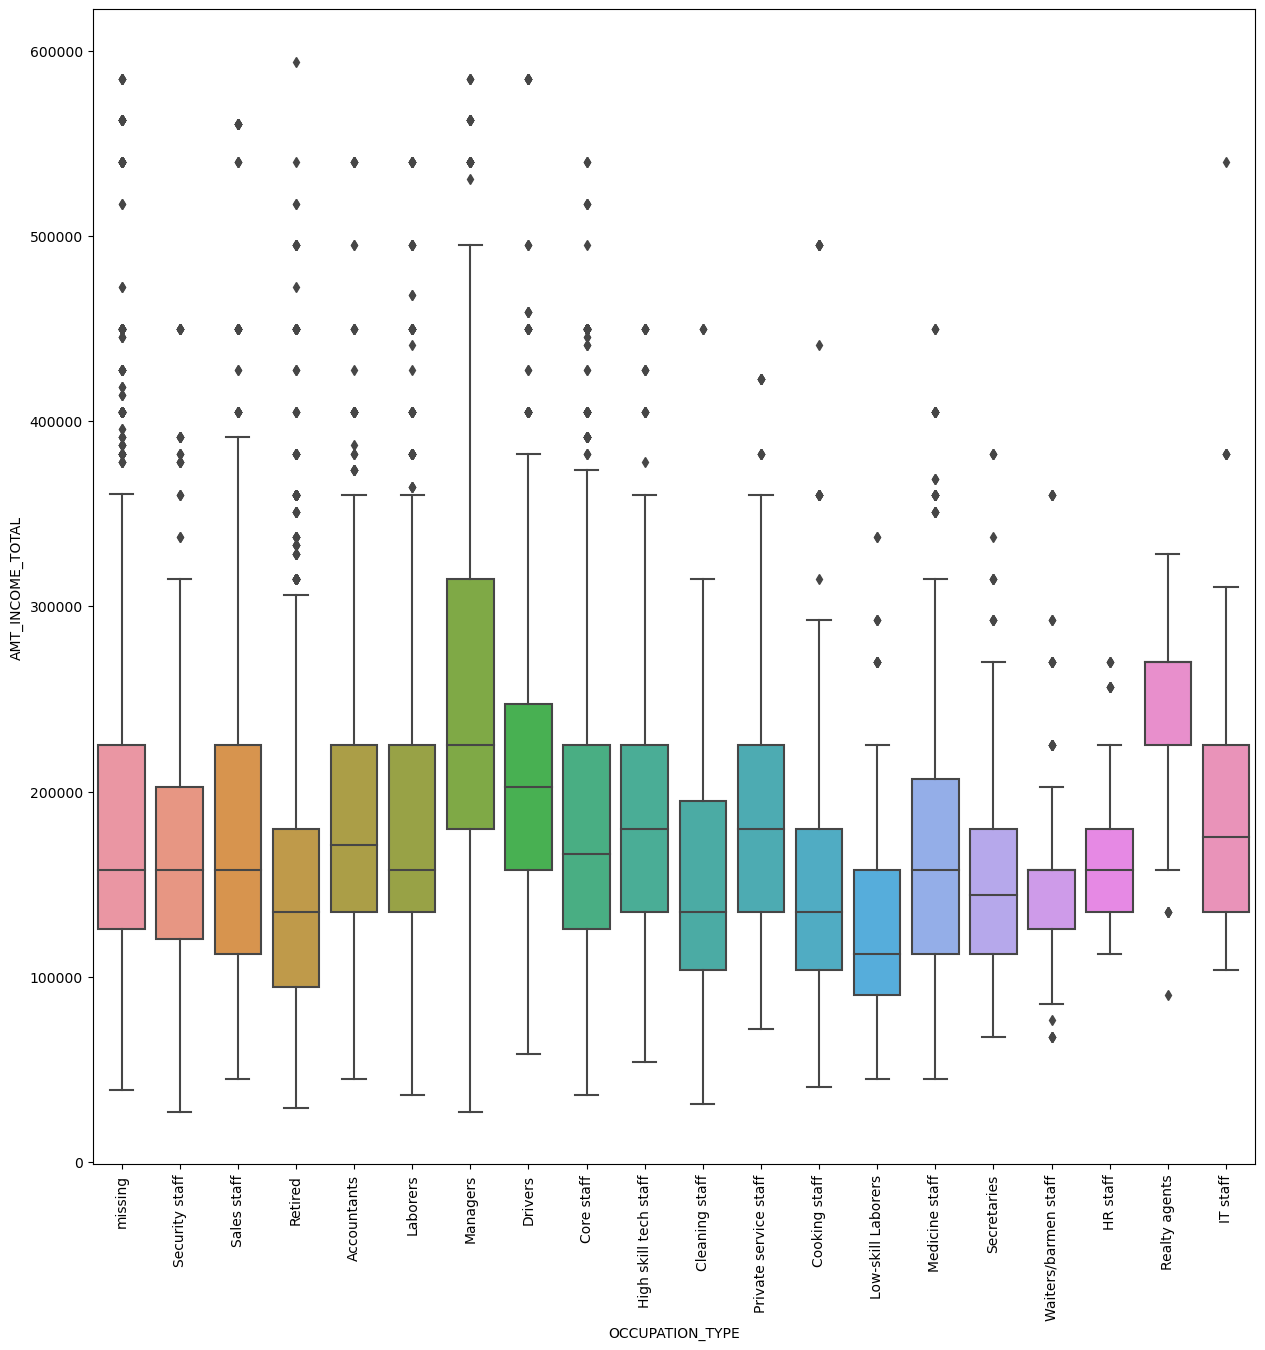

In [58]:
plt.figure(figsize = (15, 15))
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=data_merged[data_merged['AMT_INCOME_TOTAL']<0.6e6])
plt.xticks(rotation = 90);

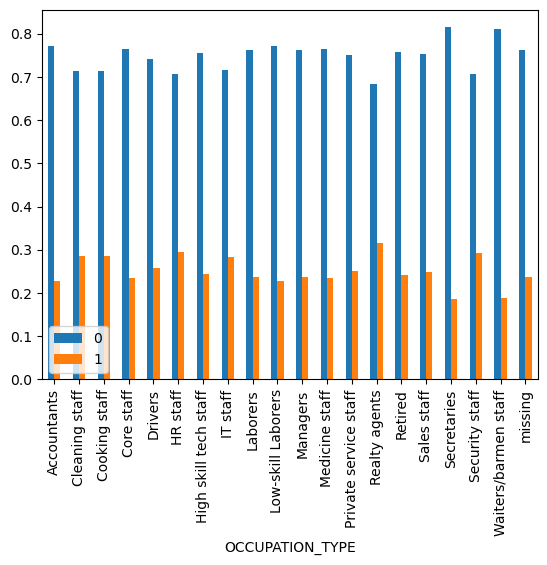

In [59]:
data_merged.groupby('OCCUPATION_TYPE')['is_delinquent'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

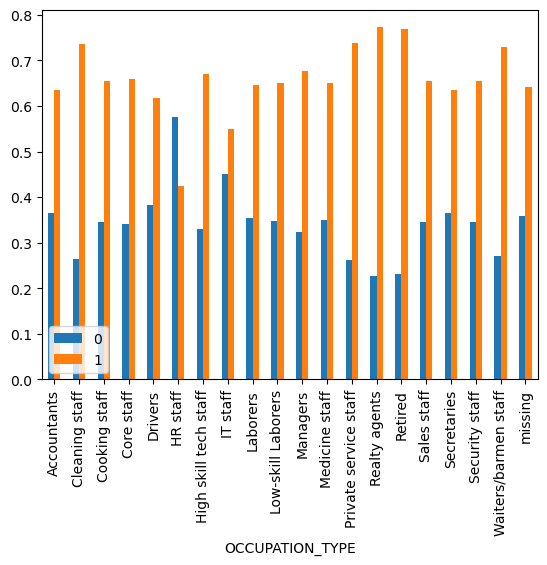

In [60]:
data_merged.groupby('OCCUPATION_TYPE')['FLAG_OWN_REALTY'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');


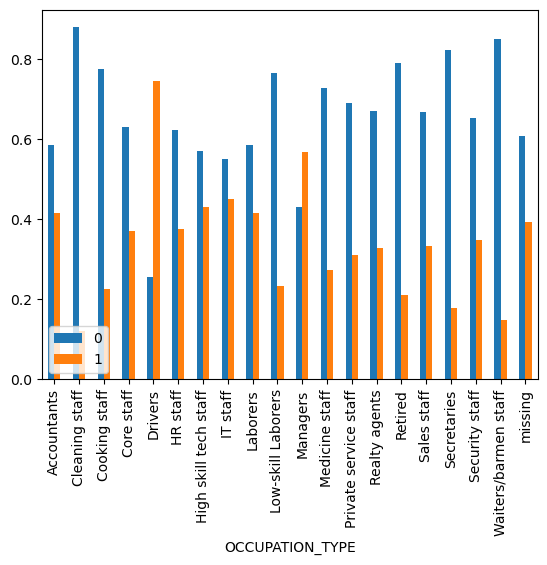

In [61]:
data_merged.groupby('OCCUPATION_TYPE')['FLAG_OWN_CAR'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar').legend(loc='lower left');

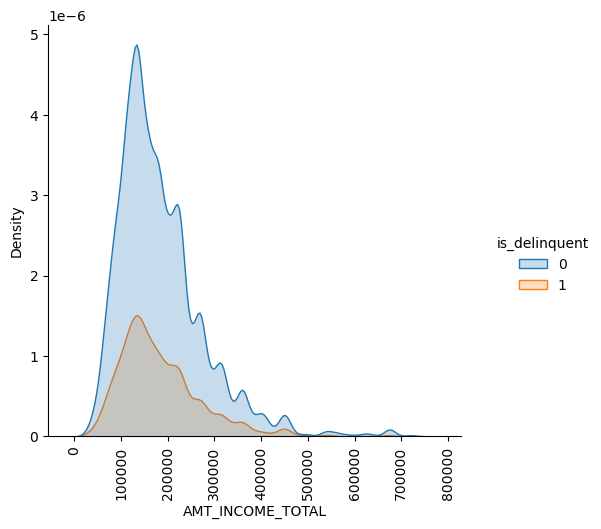

In [62]:
sns.displot(data_merged[data_merged['AMT_INCOME_TOTAL']<0.75e6], x="AMT_INCOME_TOTAL", hue="is_delinquent", kind="kde", fill=True)
plt.xticks(rotation = 90);

In [63]:
data_merged.columns

Index(['ID', 'is_delinquent', 'length_of_credit',
       'number_of_delinquent_months', 'average_delinquency_rate',
       '3mo_delinquency', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

<Axes: xlabel='AGE', ylabel='AMT_INCOME_TOTAL'>

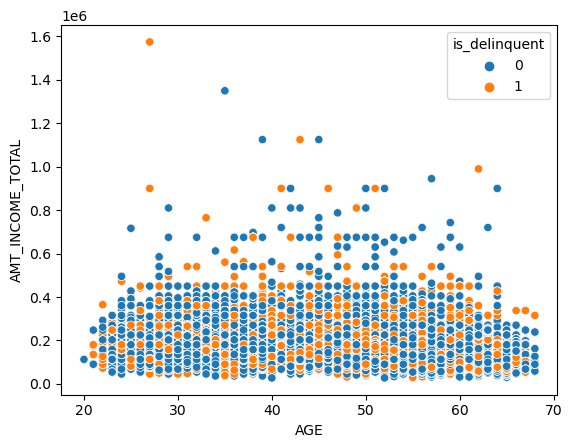

In [64]:
sns.scatterplot(data = data_merged, x = 'AGE', y = 'AMT_INCOME_TOTAL' ,hue = 'is_delinquent')

<Axes: xlabel='AGE', ylabel='Density'>

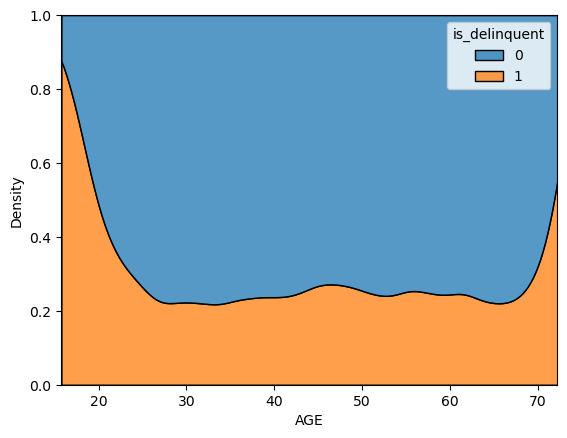

In [65]:
sns.kdeplot(data=data_merged, x="AGE", hue="is_delinquent", multiple="fill")

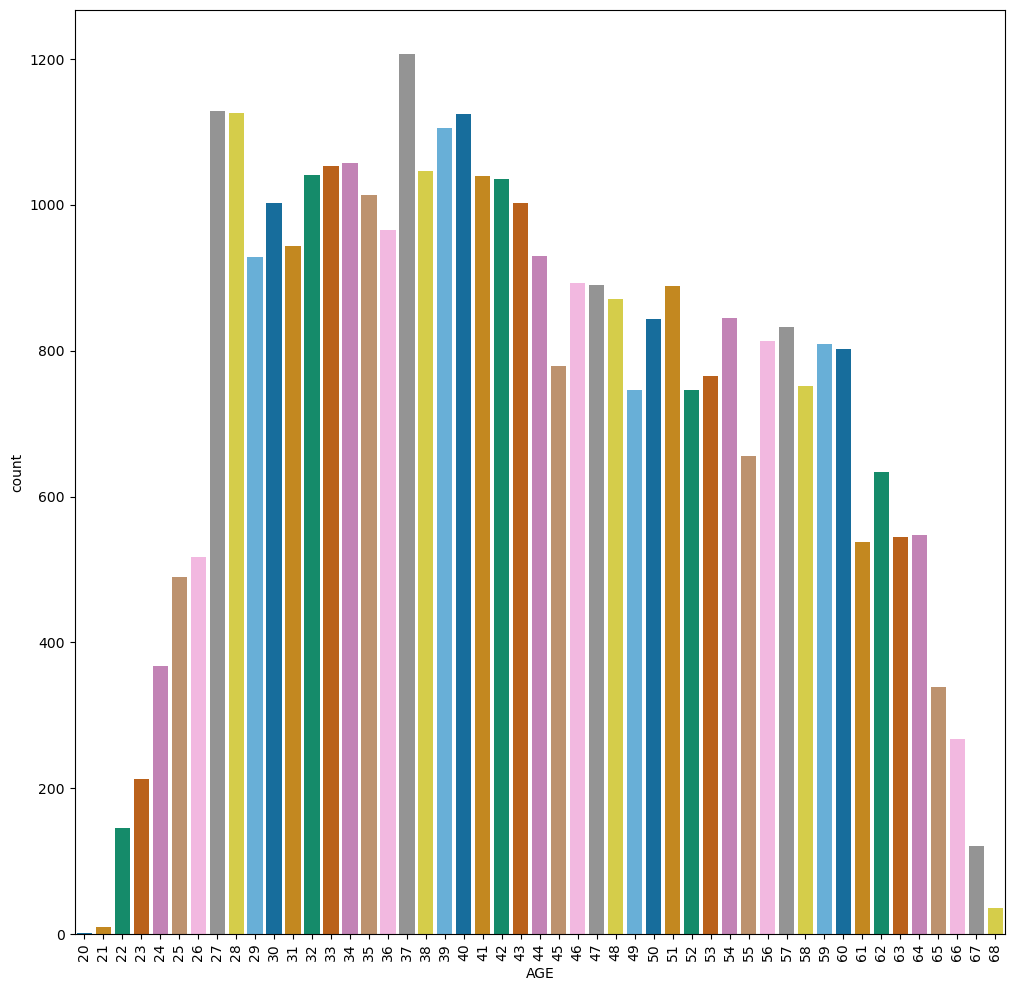

In [66]:
plt.figure(figsize=(12, 12))
sns.countplot(data = data_merged, x='AGE', palette='colorblind')
plt.xticks(rotation = 90);